Processing hc1.txt...
Final Cost for hc1.txt: 121
Time taken: 0.78 seconds


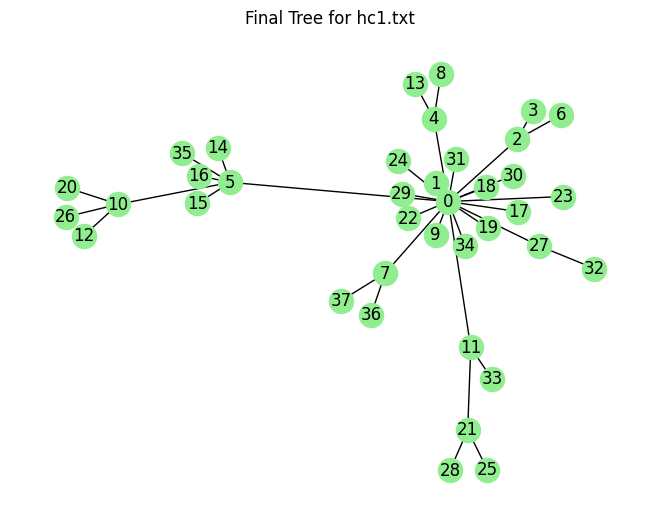

Processing hc2.txt...
Final Cost for hc2.txt: 121
Time taken: 0.76 seconds


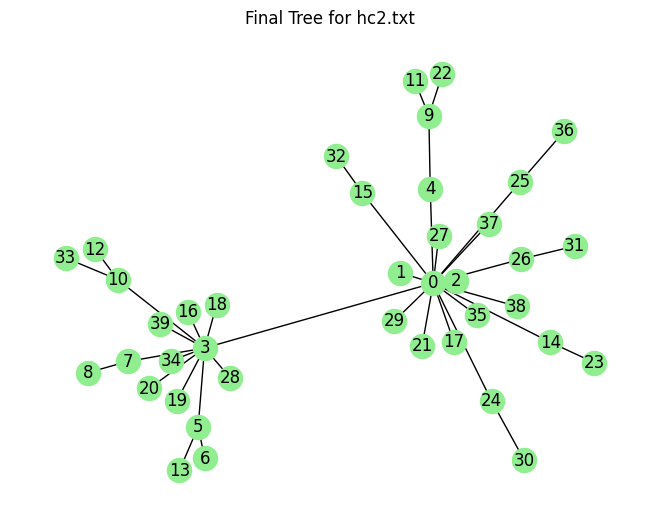

Processing hc3.txt...
Final Cost for hc3.txt: 116
Time taken: 1.60 seconds


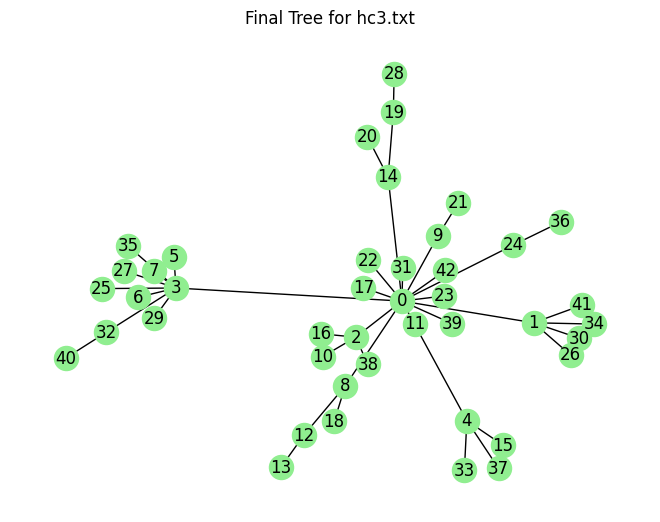

Processing hc4.txt...
Final Cost for hc4.txt: 138
Time taken: 2.33 seconds


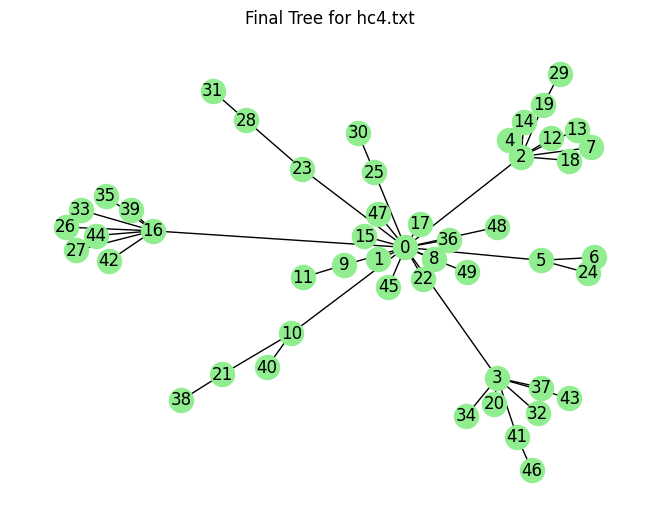

Processing matrix1.txt...
Final Cost for matrix1.txt: 3
Time taken: 0.14 seconds


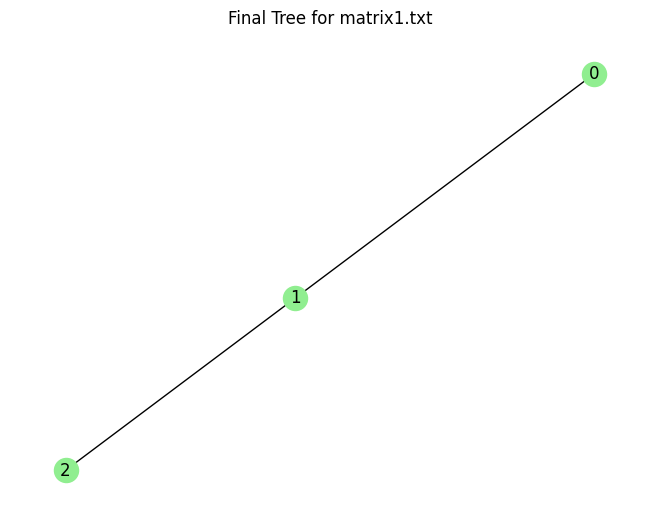

Processing matrix2.txt...
Final Cost for matrix2.txt: 6
Time taken: 0.09 seconds


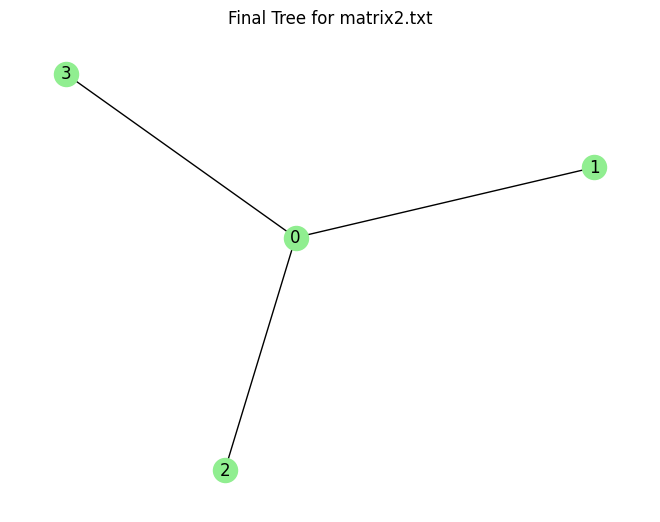

Processing matrix3.txt...
Final Cost for matrix3.txt: 6
Time taken: 0.06 seconds


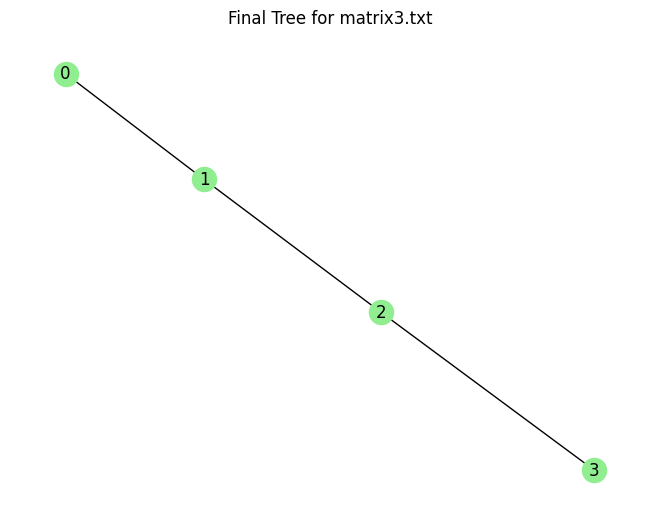

Processing matrix4.txt...
Final Cost for matrix4.txt: 4
Time taken: 0.07 seconds


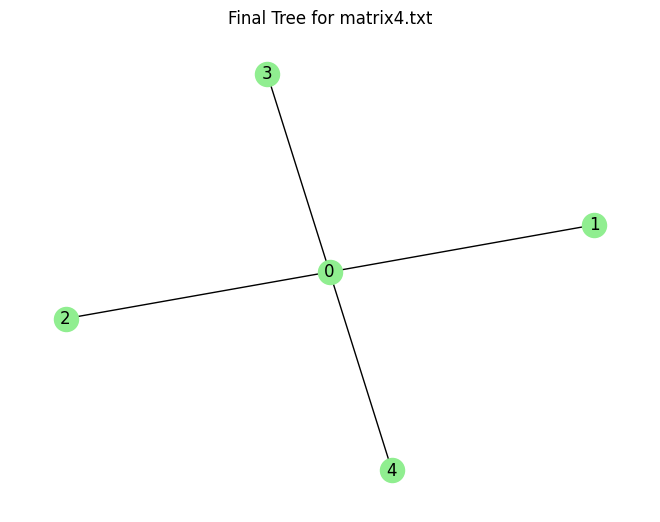

Processing matrix5.txt...
Final Cost for matrix5.txt: 40
Time taken: 0.14 seconds


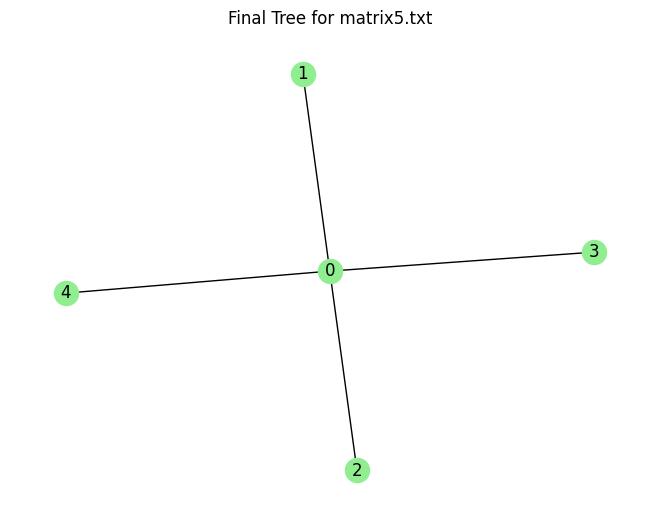

Processing matrix6.txt...
Final Cost for matrix6.txt: 10
Time taken: 0.07 seconds


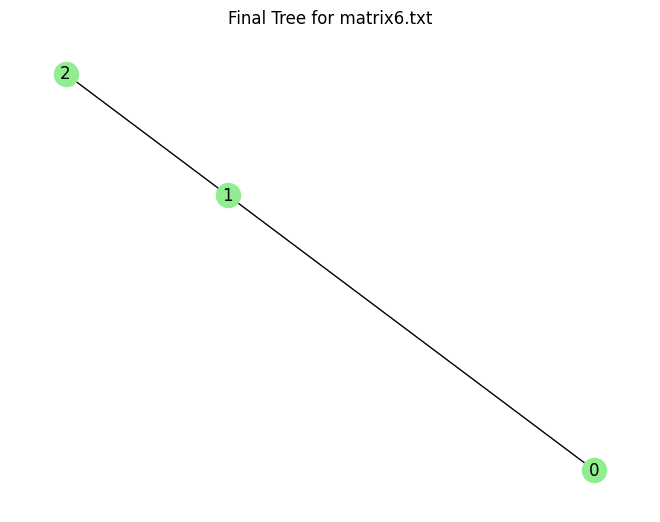

Processing matrix7.txt...
Final Cost for matrix7.txt: 4
Time taken: 0.05 seconds


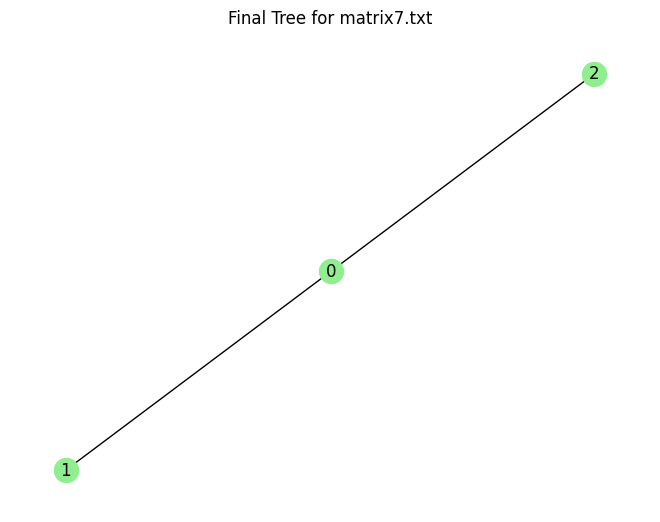

Processing matrix8.txt...
Final Cost for matrix8.txt: 65
Time taken: 0.17 seconds


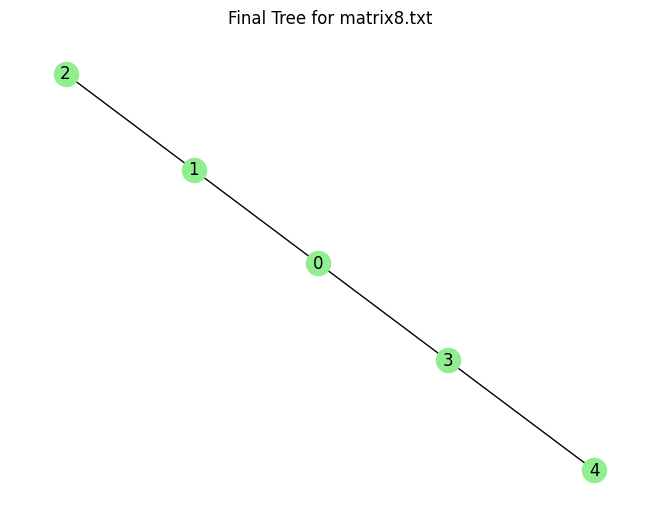

Processing mst1.txt...
Final Cost for mst1.txt: 27
Time taken: 0.13 seconds


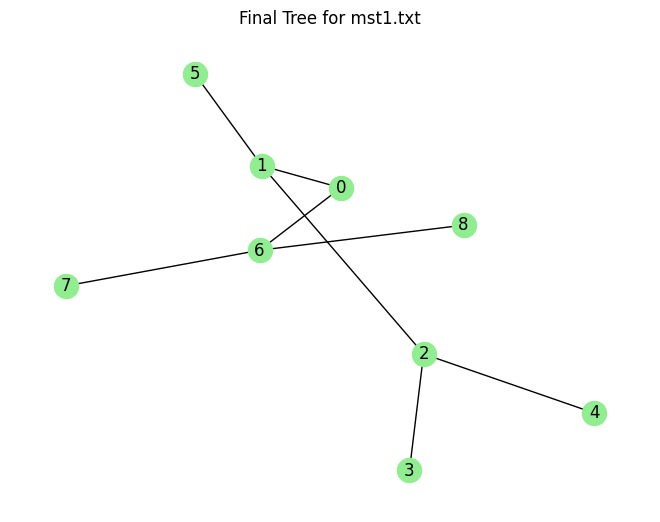

Processing mst2.txt...
Final Cost for mst2.txt: 108
Time taken: 0.44 seconds


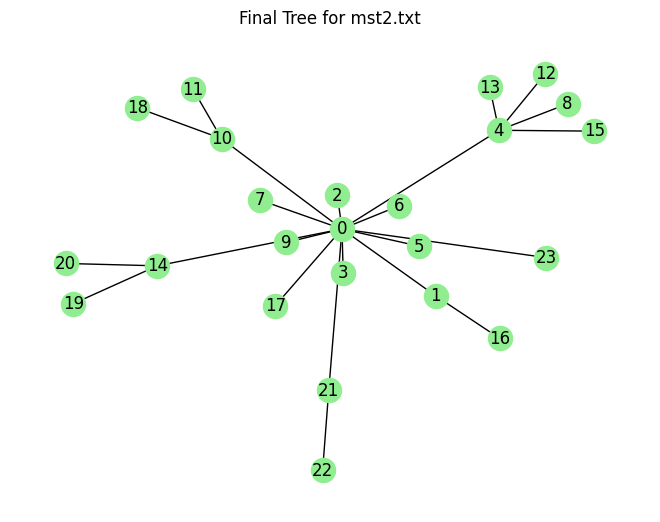

Processing mst3.txt...
Final Cost for mst3.txt: 53
Time taken: 0.13 seconds


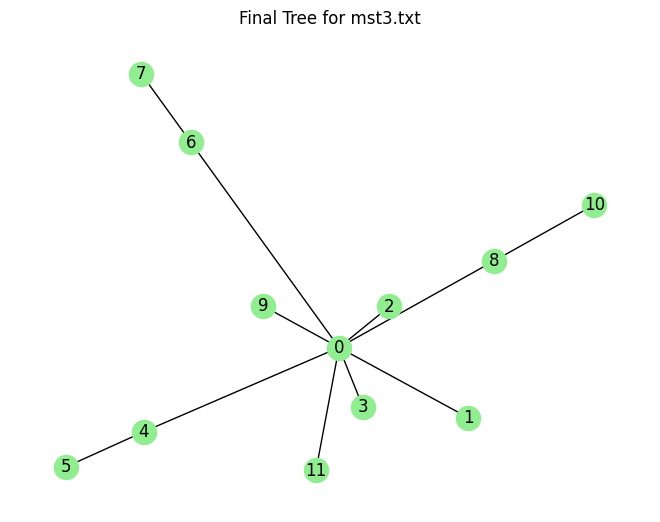

Processing mst4.txt...
Final Cost for mst4.txt: 74
Time taken: 0.36 seconds


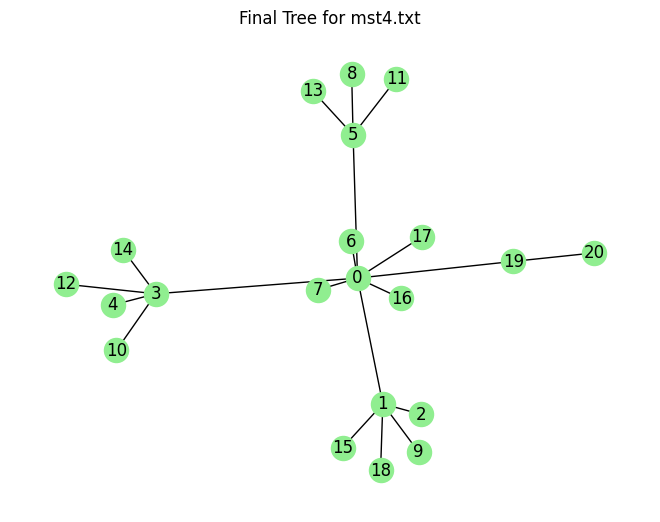

Processing mst5.txt...
Final Cost for mst5.txt: 72
Time taken: 0.41 seconds


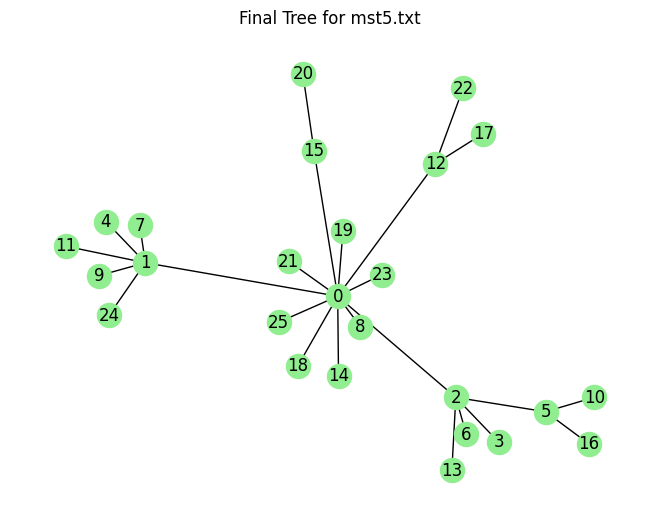

Processing mst6.txt...
Final Cost for mst6.txt: 101
Time taken: 0.40 seconds


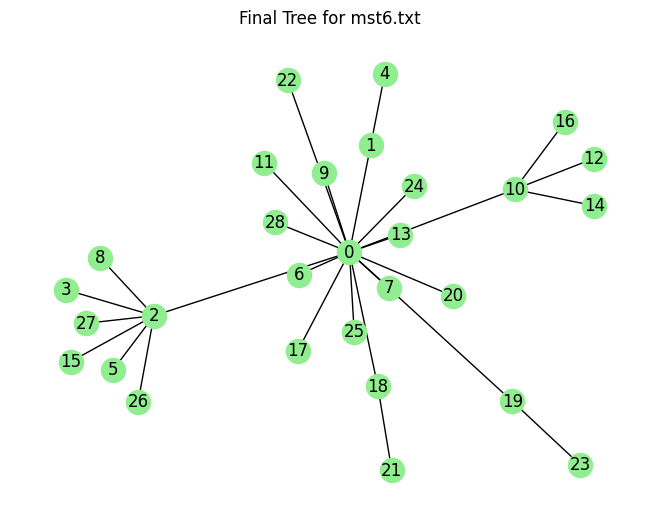

Processing mst7.txt...
Final Cost for mst7.txt: 121
Time taken: 0.96 seconds


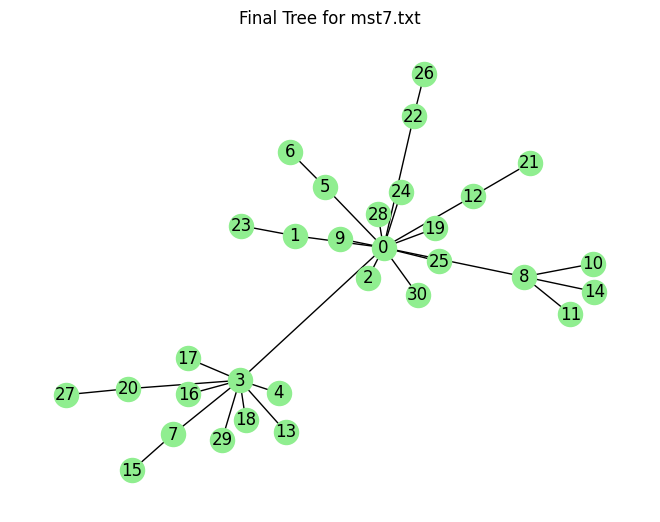

In [2]:
import numpy as np
import networkx as nx
import random
import math
import os
import itertools
import matplotlib.pyplot as plt
import time


def load_matrices_from_directory(directory_path):
    matrices = {}
    directory = os.path.abspath(directory_path)
    files = sorted([f for f in os.listdir(directory) if f.startswith('matrix') or f.startswith('mst') or f.startswith('hc') and f.endswith('.txt')])
    for filename in files:
        file_path = os.path.join(directory, filename)
        matrix = np.loadtxt(file_path, dtype=int, delimiter=' ')
        matrices[filename] = matrix
    return matrices

def initial_tree(M):
    G = nx.Graph()
    n = len(M)
    for i in range(n):
        for j in range(i+1, n):
            G.add_edge(i, j, weight=M[i][j])
    return nx.minimum_spanning_tree(G)

def cost_function(T):
    return sum(data['weight'] for u, v, data in T.edges(data=True))

def get_neighbor(T, M):
    n = len(M)
    edges = list(T.edges())
    non_edges = [e for e in itertools.combinations(range(n), 2) if e not in edges]

    if not non_edges: 
        return T

    edge_to_remove = random.choice(edges)
    edge_to_add = random.choice(non_edges)
   
    T.remove_edge(*edge_to_remove)
    T.add_edge(*edge_to_add, weight=M[edge_to_add[0]][edge_to_add[1]])
   
    if nx.is_tree(T):
        return T
    else:
        T.remove_edge(*edge_to_add)
        T.add_edge(*edge_to_remove, weight=M[edge_to_remove[0]][edge_to_remove[1]])
        return T


def simulated_annealing(M, T_init, T, max_iter=1000):
    current_T = T_init
    current_cost = cost_function(current_T)
    best_T = current_T
    best_cost = current_cost
   
    for i in range(max_iter):
        T_new = get_neighbor(current_T.copy(), M)
        new_cost = cost_function(T_new)
        delta_E = new_cost - current_cost
       
        if delta_E < 0 or random.random() < math.exp(-delta_E / T):
            current_T = T_new
            current_cost = new_cost
           
            if new_cost < best_cost:
                best_T = current_T
                best_cost = new_cost
       
        T *= 0.99  
       
    return best_T, best_cost


def process_matrices(directory_path):
    matrices = load_matrices_from_directory(directory_path)
    for name, M in matrices.items():
        print(f"Processing {name}...")

        start_time = time.time()
       
        T_init = initial_tree(M)
        final_tree, final_cost = simulated_annealing(M, T_init, T = 10.0)

        end_time = time.time()

        elapsed_time = end_time - start_time
       
        print(f"Final Cost for {name}: {final_cost}")
        print(f"Time taken: {elapsed_time:.2f} seconds")
       
        nx.draw(final_tree, with_labels=True, node_color='lightgreen')
        plt.title(f"Final Tree for {name}")
        plt.show()

directory_path = '../minimum-size-ultrametric-tree/tests/'
process_matrices(directory_path)

